# Data preparation

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers 

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

## Explore

In [50]:
print(f'X_train – shape {X_train.shape} \nX_test  – shape {X_test.shape} \n' 
      f'y_train – shape {y_train.shape} \ny_test  – shape {y_test.shape}') 

X_train – shape (60000, 28, 28) 
X_test  – shape (10000, 28, 28) 
y_train – shape (60000,) 
y_test  – shape (10000,)


In [24]:
print(type(y_train))
type(X_train)

<class 'numpy.ndarray'>


numpy.ndarray

In [32]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [33]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

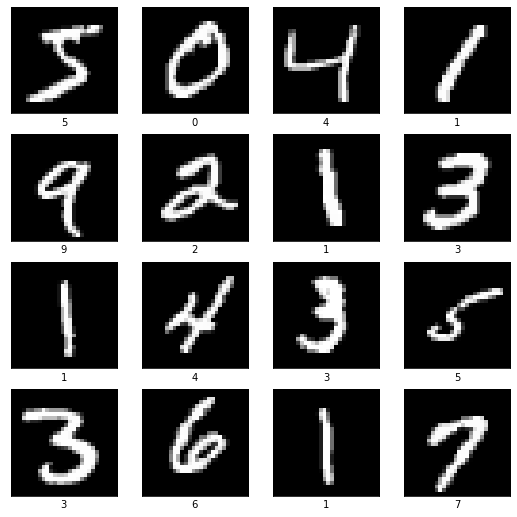

In [51]:
plt.figure(figsize = (9, 9))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.xlabel(str(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()    

## Reshape and normalise

In [52]:
# NB: the order of the following operations makes a massive difference for the model
# performance. In first attempt I divided X_train / 255. and then reshaped --> accuracy after epoch 20
# was 0.1 -- in this current order – reshape, normalise – accuracy is >0.9

X_train = np.reshape(X_train, (len(X_train), 28 * 28))
X_test = np.reshape(X_test, (len(X_test), 28 * 28))

X_train = X_train / 255.
X_test = X_test / 255.

# ML models

## 3 layers, Dense, activation function sigmoid

### Create

In [53]:
# TODO In another model, change activation function to 'relu', then normalise the output later (when?)
# sigmoid gives output 0-1, relu 0-infinite --> not great for visualisation
model = models.Sequential([
    layers.Dense(32, input_shape=(784,), activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'), 
    layers.Dense(10, activation='softmax')
    ]) 

In [54]:
model.compile(
    loss = 'sparse_categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
    ) 

### Train

In [59]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 20,
    batch_size = 1024, # check why this number
    verbose = 2
    ) 

Epoch 1/20
59/59 - 0s - loss: 0.1525 - accuracy: 0.9583 - val_loss: 0.1716 - val_accuracy: 0.9505
Epoch 2/20
59/59 - 0s - loss: 0.1488 - accuracy: 0.9586 - val_loss: 0.1684 - val_accuracy: 0.9514
Epoch 3/20
59/59 - 0s - loss: 0.1454 - accuracy: 0.9597 - val_loss: 0.1649 - val_accuracy: 0.9532
Epoch 4/20
59/59 - 0s - loss: 0.1417 - accuracy: 0.9609 - val_loss: 0.1627 - val_accuracy: 0.9529
Epoch 5/20
59/59 - 0s - loss: 0.1388 - accuracy: 0.9618 - val_loss: 0.1600 - val_accuracy: 0.9533
Epoch 6/20
59/59 - 0s - loss: 0.1353 - accuracy: 0.9624 - val_loss: 0.1587 - val_accuracy: 0.9535
Epoch 7/20
59/59 - 0s - loss: 0.1324 - accuracy: 0.9632 - val_loss: 0.1569 - val_accuracy: 0.9539
Epoch 8/20
59/59 - 0s - loss: 0.1294 - accuracy: 0.9638 - val_loss: 0.1535 - val_accuracy: 0.9549
Epoch 9/20
59/59 - 0s - loss: 0.1267 - accuracy: 0.9646 - val_loss: 0.1521 - val_accuracy: 0.9562
Epoch 10/20
59/59 - 0s - loss: 0.1239 - accuracy: 0.9652 - val_loss: 0.1499 - val_accuracy: 0.9564
Epoch 11/20
59/59 -

### Save

In [61]:
model.save('../mnist_neural_network/mnist_model.h5')

## 3 layers, one Conv2d, sigmoid

### Create

In [5]:
# TODO Wrong input shape --> need to reshape to (rows, height, width, color (1 channel))
model = models.Sequential([
    layers.Conv2D(32, (2, 2), input_shape=(784,), activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'), #  
    layers.Dense(10, activation='softmax') # 
    ]) 

model.compile(
    loss = 'sparse_categorical_crossentropy', # if one hot encode: categ_crossentr
    optimizer = 'adam',
    metrics = ['accuracy']
    ) 

ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 784)

### Train

### Save

# ML Server

In [87]:
# same code in ml_server.py 
# --> TODO tidy up, import from ml_server
model = tf.keras.models.load_model('../mnist_neural_network/mnist_model.h5') 

model_all_layers = tf.keras.models.Model(
    model.inputs,
    [layer.output for layer in model.layers], # currently: 3 layers
    )

_, (X_test2, _) = tf.keras.datasets.mnist.load_data()
X_test2 = X_test2 / 255.

def get_prediction():
    """ Return outputs (incl. y = [0-9] ?) of predict method on NN model
        showing output for all layers
    """
    index = np.random.choice(X_test2.shape[0]) # or len(X_test)?
    image = X_test2[index, :, :] # gives random row
    image_arr = np.reshape(image, (1, 784))

    return model_all_layers.predict(image_arr), image


In [88]:
preds, image = get_prediction()
type(preds)

list

In [89]:
type(image)

numpy.ndarray

In [90]:
image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [83]:
print(len(preds))
preds
# returns the three layers, 1 + 2 have 32 nodes each, 3 has 10 (y = 0-9)

3


[array([[2.5365859e-02, 2.6857355e-01, 2.2476614e-03, 9.9934530e-01,
         9.7954881e-01, 1.3455749e-02, 9.9999905e-01, 1.4542639e-03,
         1.5541911e-04, 9.9744332e-01, 1.5572071e-02, 1.9399552e-14,
         2.6594067e-05, 5.6022793e-01, 3.1581998e-10, 9.9908209e-01,
         1.2506932e-02, 2.3030788e-02, 7.2479379e-01, 1.8753606e-01,
         1.3110226e-11, 7.9846094e-09, 2.8397986e-01, 8.4071755e-03,
         9.9816155e-01, 2.4035156e-02, 1.4937620e-09, 2.7502683e-10,
         1.2926757e-03, 9.9987060e-01, 9.9416429e-01, 8.5951984e-01]],
       dtype=float32),
 array([[0.66975784, 0.17144412, 0.8609518 , 0.2537238 , 0.79253596,
         0.82655585, 0.8572259 , 0.8730975 , 0.07310054, 0.03326786,
         0.6786599 , 0.08446527, 0.7919488 , 0.1446825 , 0.207629  ,
         0.9745549 , 0.67576694, 0.27516162, 0.25720587, 0.31216398,
         0.39845067, 0.77755415, 0.40128672, 0.72044164, 0.41667062,
         0.64996636, 0.39695334, 0.62985384, 0.05339524, 0.18532813,
         

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

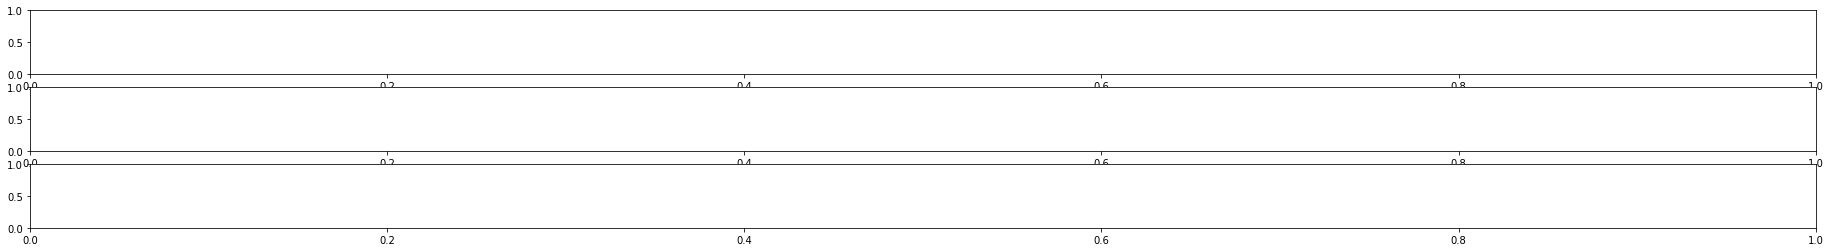

In [96]:
#TODO figure out fig, ax in a for loop? because st.pyplot() deprecated

import requests

URI = 'http://127.0.0.1:5000/'

response = requests.post(URI, data={})
response = json.loads(response.text)
preds = response.get('prediction')
image = response.get('image')
image = np.reshape(image, (28, 28))

fig, ax = plt.subplots(3, 1, figsize=(32,4))
for layer, pred in enumerate(preds):
    numbers = np.squeeze(np.array(pred)) # removes additional dimensionality of the data

    #plt.figure(figsize=(32, 4))
    #if layer == 2: # my final layer
     #   row = 1
      #  col = 10
    #else:
     #   row = 2
      #  col = 16

    for i, number in enumerate(numbers):
        ax.plot(number * np.ones((8, 8, 3)).astype('float32'))  #plt.subplot(row, col, i + 1)
        #plt.imshow(number * np.ones((8, 8, 3)).astype('float32'))
        #plt.xticks([])
        #plt.yticks([])

       # if layer == 2:
        #    plt.xlabel(str(i), fontsize=40)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    plt.tight_layout()

    st.text(f'Layer {layer + 1} (colour range: black == 0, white == 1')
    st.pyplot(fig) #st.pyplot()